In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machina-doctrina/sample.csv
/kaggle/input/machina-doctrina/TrainDataset.csv
/kaggle/input/machina-doctrina/TestDataset.csv


In [4]:
train = pd.read_csv('../input/machina-doctrina/TrainDataset.csv')

In [5]:
test = pd.read_csv('../input/machina-doctrina/TestDataset.csv')

In [6]:
train.head()

,ID,Parameter-1,Parameter-2,Parameter-3,Parameter-4,Parameter-5,Parameter-6,Parameter-7,Target-1,Target-2,Target-3,Target-4,Target-5
0,1,M14860,M,297.6,309.1,1559,43.6,4,0,0,0,0,0
1,2,L47181,L,298.4,309.5,1408,46.4,7,0,0,0,0,0
2,3,L47182,L,298.4,308.7,1505,49.4,8,0,0,0,0,0
3,4,L47183,L,298.8,308.9,1443,40.3,13,0,0,0,0,0
4,5,L47184,L,299.7,309.6,1423,40.4,9,0,0,0,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           10000 non-null  int64  
 1   Parameter-1  10000 non-null  object 
 2   Parameter-2  10000 non-null  object 
 3   Parameter-3  10000 non-null  float64
 4   Parameter-4  10000 non-null  float64
 5   Parameter-5  10000 non-null  int64  
 6   Parameter-6  10000 non-null  float64
 7   Parameter-7  10000 non-null  int64  
 8   Target-1     10000 non-null  int64  
 9   Target-2     10000 non-null  int64  
 10  Target-3     10000 non-null  int64  
 11  Target-4     10000 non-null  int64  
 12  Target-5     10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1015.8+ KB


In [8]:
train['Parameter-2'].value_counts()

L    6000
M    2997
H    1003
Name: Parameter-2, dtype: int64

Imbalance


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 

<AxesSubplot:xlabel='Parameter-3', ylabel='Count'>

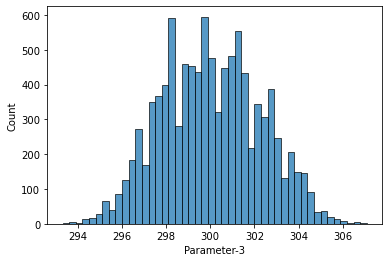

In [10]:
sns.histplot(train['Parameter-3'])

In [11]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Parameter-4', ylabel='Count'>

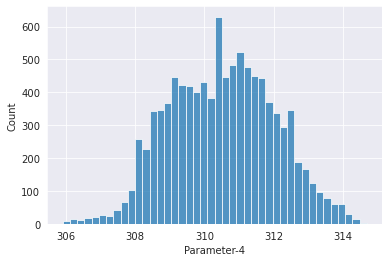

In [12]:
sns.histplot(train['Parameter-4'])

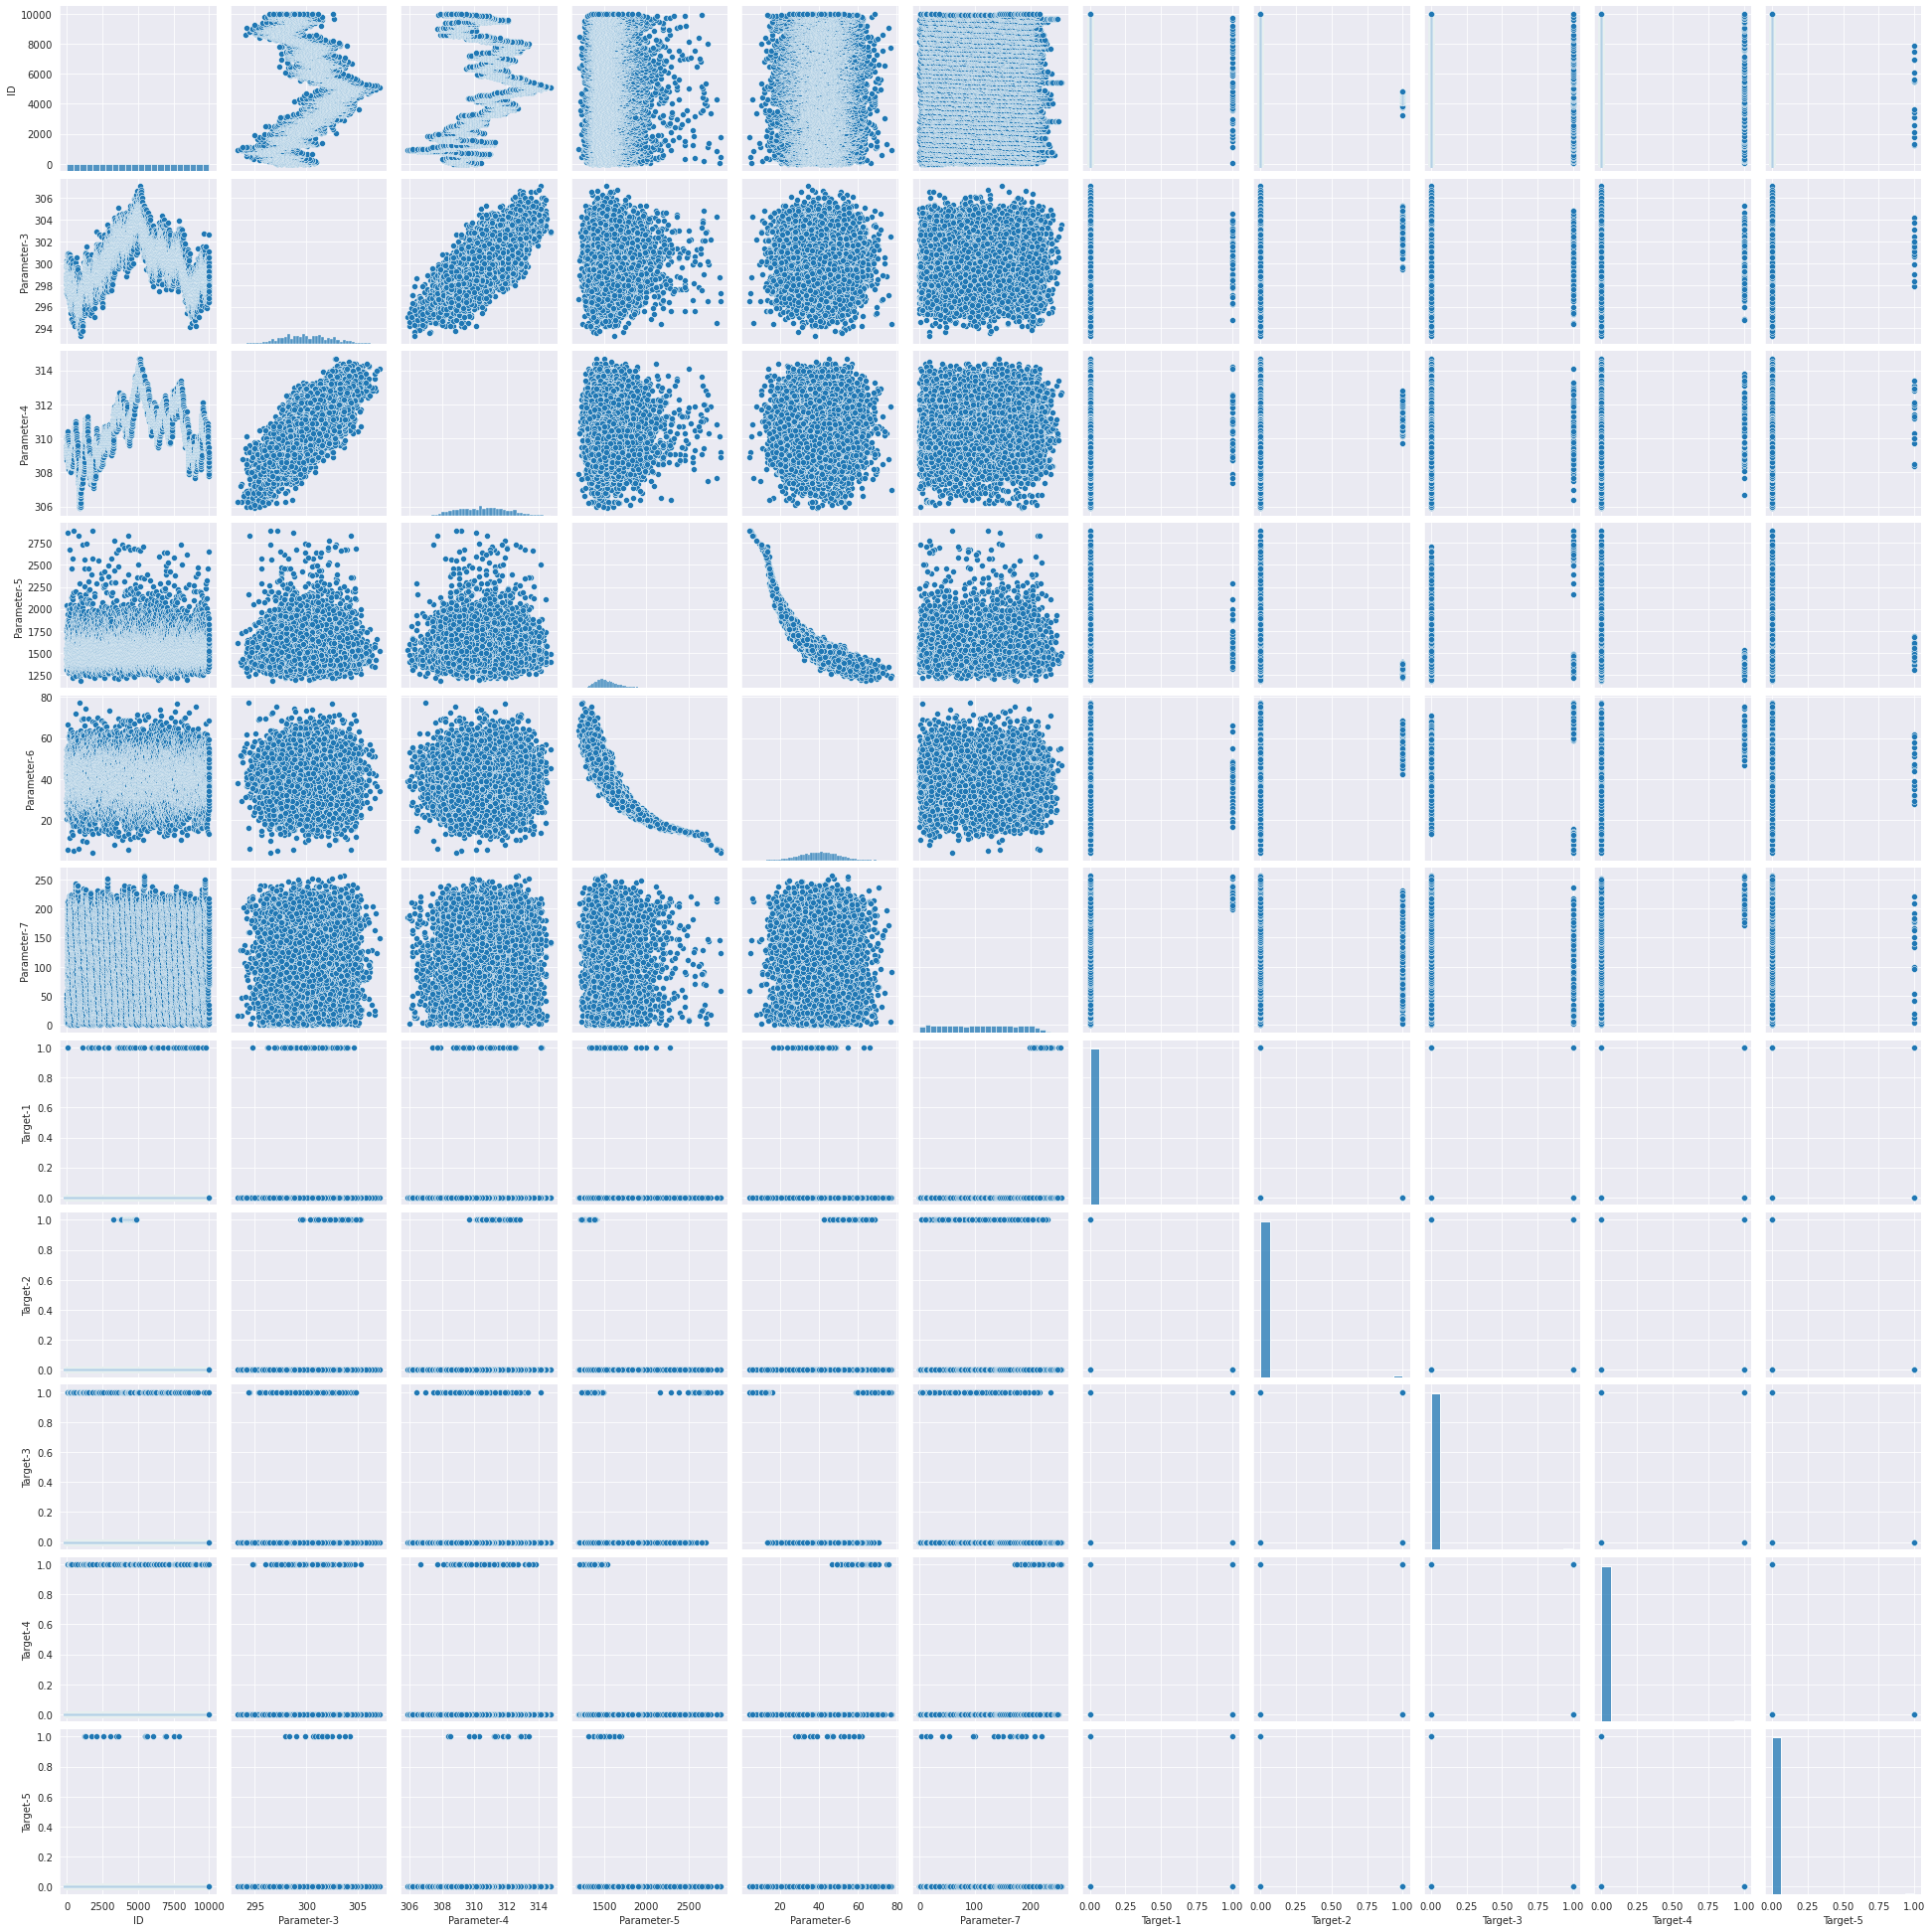

In [13]:
sns.pairplot(train)

In [21]:
train['Target-1'].value_counts()

0    9954
1      46
Name: Target-1, dtype: int64

In [22]:
train['Target-2'].value_counts()

0    9885
1     115
Name: Target-2, dtype: int64

In [23]:
train['Target-3'].value_counts()

0    9905
1      95
Name: Target-3, dtype: int64

In [24]:
train['Target-4'].value_counts()

0    9902
1      98
Name: Target-4, dtype: int64

In [25]:
train['Target-5'].value_counts()

0    9981
1      19
Name: Target-5, dtype: int64

In [50]:
col_list = 'Parameter-2 Parameter-3 Parameter-4 Parameter-5 Parameter-6 Parameter-7'.split()
X = train[col_list]

In [51]:
X = pd.get_dummies(X, columns = ['Parameter-2'],drop_first = True)

In [52]:
X

,Parameter-3,Parameter-4,Parameter-5,Parameter-6,Parameter-7,Parameter-2_L,Parameter-2_M
0,297.6,309.1,1559,43.6,4,0,1
1,298.4,309.5,1408,46.4,7,1,0
2,298.4,308.7,1505,49.4,8,1,0
3,298.8,308.9,1443,40.3,13,1,0
4,299.7,309.6,1423,40.4,9,1,0
...,...,...,...,...,...,...,...
9995,298.1,309.0,1608,30.0,20,0,1
9996,298.0,308.6,1651,32.1,21,0,0
9997,298.8,308.9,1657,34.0,22,0,1
9998,298.8,309.1,1426,49.5,28,0,0


In [111]:
target_list = 'Target-1 Target-2 Target-3 Target-4 Target-5'.split()
y = train[target_list]

In [113]:
def targetcoloumn(x):
    if(sum(x) > 1):
        return float("NaN")
    if(x[0] == 1):
        return 1
    if(x[1] == 1):
        return 2
    if(x[2] == 1):
        return 3
    if(x[3] == 1):
        return 4
    if(x[4] == 1):
        return 5
    return 0

In [114]:
target = y.apply(targetcoloumn,axis = 1)

In [117]:
target.isnull().sum()

24

In [118]:
new = pd.concat([train,target], axis =1)
new

,ID,Parameter-1,Parameter-2,Parameter-3,Parameter-4,Parameter-5,Parameter-6,Parameter-7,Target-1,Target-2,Target-3,Target-4,Target-5,0
0,1,M14860,M,297.6,309.1,1559,43.6,4,0,0,0,0,0,0.0
1,2,L47181,L,298.4,309.5,1408,46.4,7,0,0,0,0,0,0.0
2,3,L47182,L,298.4,308.7,1505,49.4,8,0,0,0,0,0,0.0
3,4,L47183,L,298.8,308.9,1443,40.3,13,0,0,0,0,0,0.0
4,5,L47184,L,299.7,309.6,1423,40.4,9,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.1,309.0,1608,30.0,20,0,0,0,0,0,0.0
9996,9997,H39410,H,298.0,308.6,1651,32.1,21,0,0,0,0,0,0.0
9997,9998,M24857,M,298.8,308.9,1657,34.0,22,0,0,0,0,0,0.0
9998,9999,H39412,H,298.8,309.1,1426,49.5,28,0,0,0,0,0,0.0


In [124]:
train = new.dropna()

In [125]:
train.shape

(9976, 14)

In [136]:
col_list = 'Parameter-2 Parameter-3 Parameter-4 Parameter-5 Parameter-6 Parameter-7'.split()
X = train[col_list]
X = pd.get_dummies(X, columns = ['Parameter-2'],drop_first = True)
X

,Parameter-3,Parameter-4,Parameter-5,Parameter-6,Parameter-7,Parameter-2_L,Parameter-2_M
0,297.6,309.1,1559,43.6,4,0,1
1,298.4,309.5,1408,46.4,7,1,0
2,298.4,308.7,1505,49.4,8,1,0
3,298.8,308.9,1443,40.3,13,1,0
4,299.7,309.6,1423,40.4,9,1,0
...,...,...,...,...,...,...,...
9995,298.1,309.0,1608,30.0,20,0,1
9996,298.0,308.6,1651,32.1,21,0,0
9997,298.8,308.9,1657,34.0,22,0,1
9998,298.8,309.1,1426,49.5,28,0,0


In [137]:
y = train[0]

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test ,y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [140]:
y_train

6010    0.0
5878    0.0
7712    0.0
9459    0.0
5172    0.0
       ... 
5751    0.0
5206    0.0
5407    0.0
861     0.0
7290    0.0
Name: 0, Length: 6983, dtype: float64

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
X_train

array([[ 0.74437117,  0.25478792, -0.65247582, ..., -1.30536927,
        -1.22774625, -0.65601556],
       [-0.00755019,  0.51746596,  0.00708715, ...,  0.2792166 ,
         0.81450055, -0.65601556],
       [ 0.25783382,  0.71447449, -0.2444411 , ..., -0.54476805,
         0.81450055, -0.65601556],
       ...,
       [ 0.83283251,  1.5025086 ,  2.36586322, ..., -1.52721129,
         0.81450055, -0.65601556],
       [-1.95369959, -1.9123059 ,  2.3267366 , ..., -1.14691068,
        -1.22774625,  1.52435409],
       [ 0.12514182,  0.45179645,  1.47713006, ..., -0.29123431,
         0.81450055, -0.65601556]])

In [66]:
X_test.shape

(3000, 7)

In [143]:
from sklearn.linear_model import LogisticRegression

In [146]:
lr = LogisticRegression(multi_class = 'multinomial')

In [147]:
lr.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(multi_class='multinomial')

In [149]:
pred = lr.predict(X_test)

In [150]:
from sklearn.metrics import confusion_matrix , classification_report

In [151]:
print(confusion_matrix(y_test,pred))

[[2895    0    2    2    0    0]
 [  10    0    0    0    0    0]
 [  28    0    1    0    0    0]
 [   9    0    1   13    0    0]
 [   8    0    1    0   17    0]
 [   6    0    0    0    0    0]]


In [152]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2899
         1.0       0.00      0.00      0.00        10
         2.0       0.20      0.03      0.06        29
         3.0       0.87      0.57      0.68        23
         4.0       1.00      0.65      0.79        26
         5.0       0.00      0.00      0.00         6

    accuracy                           0.98      2993
   macro avg       0.51      0.38      0.42      2993
weighted avg       0.97      0.98      0.97      2993



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [153]:
test

,ID,Parameter-1,Parameter-2,Parameter-3,Parameter-4,Parameter-5,Parameter-6,Parameter-7
0,9255,L56434,L,298.3,309.1,1616,31.1,195
1,1562,L48741,L,298.2,308.4,1388,53.8,137
2,1671,L48850,L,298.2,307.8,1528,31.1,194
3,6088,M20947,M,300.9,310.8,1599,33.0,7
4,6670,L53849,L,301.4,310.5,1571,33.9,208
...,...,...,...,...,...,...,...,...
7995,5735,L52914,L,302.3,311.8,1369,56.2,208
7996,5192,L52371,L,304.0,313.2,1416,46.0,128
7997,5391,H34804,H,302.8,312.3,1483,47.2,223
7998,861,H30274,H,296.1,306.9,1541,32.6,33


In [154]:
col_list = 'Parameter-2 Parameter-3 Parameter-4 Parameter-5 Parameter-6 Parameter-7'.split()
k = test[col_list]

In [156]:
k = pd.get_dummies(k, columns = ['Parameter-2'],drop_first = True)

In [157]:
k

,Parameter-3,Parameter-4,Parameter-5,Parameter-6,Parameter-7,Parameter-2_L,Parameter-2_M
0,298.3,309.1,1616,31.1,195,1,0
1,298.2,308.4,1388,53.8,137,1,0
2,298.2,307.8,1528,31.1,194,1,0
3,300.9,310.8,1599,33.0,7,0,1
4,301.4,310.5,1571,33.9,208,1,0
...,...,...,...,...,...,...,...
7995,302.3,311.8,1369,56.2,208,1,0
7996,304.0,313.2,1416,46.0,128,1,0
7997,302.8,312.3,1483,47.2,223,0,0
7998,296.1,306.9,1541,32.6,33,0,0


In [158]:
k = scaler.transform(k)

In [159]:
sub_pred = lr.predict(k)

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [161]:
output = pd.get_dummies(sub_pred,prefix = 'Target',drop_first = False,prefix_sep = '-')

In [162]:
output

,Target-0.0,Target-2.0,Target-3.0,Target-4.0
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
7995,0,0,0,1
7996,1,0,0,0
7997,1,0,0,0
7998,1,0,0,0


bias bht jyada h


In [165]:
from imblearn.over_sampling import SMOTENC

In [166]:
smotenc = SMOTENC([5,6], random_state = 100)
X_oversample , y_oversample = smotenc.fit_resample(X_train,y_train)

In [167]:
newlr = LogisticRegression(multi_class = 'multinomial')

In [168]:
newlr.fit(X_oversample, y_oversample)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(multi_class='multinomial')

In [172]:
pred = newlr.predict(X_test)

In [173]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      0.61      0.76      2899
         1.0       0.05      1.00      0.09        10
         2.0       0.11      0.93      0.20        29
         3.0       0.34      0.96      0.51        23
         4.0       0.58      0.96      0.72        26
         5.0       0.00      0.33      0.01         6

    accuracy                           0.62      2993
   macro avg       0.35      0.80      0.38      2993
weighted avg       0.97      0.62      0.75      2993



In [186]:
sub_pred = newlr.predict(k)

In [187]:
output = pd.get_dummies(sub_pred,prefix = 'Target',drop_first = False,prefix_sep = '-')

In [188]:
output
output.drop(['Target-0.0'], axis = 1, inplace = True)
output = pd.concat([test['ID'],output], axis = 1)
mapval = {"Target-1.0" : 'Target-1',"Target-2.0" : 'Target-2',"Target-3.0" : 'Target-3',"Target-4.0" : 'Target-4',"Target-5.0" : 'Target-5'}
output = output.rename(columns = mapval)
output.to_csv('Output.csv',index=False)

In [189]:
output

,ID,Target-1,Target-2,Target-3,Target-4,Target-5
0,9255,0,0,0,0,0
1,1562,0,0,0,0,0
2,1671,1,0,0,0,0
3,6088,0,0,0,0,0
4,6670,1,0,0,0,0
...,...,...,...,...,...,...
7995,5735,0,0,0,1,0
7996,5192,0,0,0,0,1
7997,5391,1,0,0,0,0
7998,861,0,0,0,0,0


newlr model give the score of 0.90132 on kaggle leaderboard

In [190]:
from sklearn.ensemble import RandomForestClassifier



In [191]:
forest = RandomForestClassifier(n_estimators = 300)

In [192]:
forest.fit(X_oversample,y_oversample)

RandomForestClassifier(n_estimators=300)

In [193]:
pred = forest.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      2899
         1.0       0.07      0.30      0.12        10
         2.0       0.38      0.52      0.43        29
         3.0       0.64      0.78      0.71        23
         4.0       0.77      0.88      0.82        26
         5.0       0.00      0.00      0.00         6

    accuracy                           0.95      2993
   macro avg       0.47      0.57      0.51      2993
weighted avg       0.97      0.95      0.96      2993



In [194]:
sub_pred = forest.predict(k)

In [195]:
output2 = pd.get_dummies(sub_pred,prefix = 'Target',drop_first = False,prefix_sep = '-')

In [197]:
output2.drop(['Target-0.0'], axis = 1, inplace = True)
output2 = pd.concat([test['ID'],output2], axis = 1)
mapval = {"Target-1.0" : 'Target-1',"Target-2.0" : 'Target-2',"Target-3.0" : 'Target-3',"Target-4.0" : 'Target-4',"Target-5.0" : 'Target-5'}
output2 = output2.rename(columns = mapval)
output2.to_csv('Output2.csv',index=False)

forest model gave the accuracy of - 0.82810

In [198]:
from sklearn.svm import LinearSVC

In [215]:
svc = LinearSVC(multi_class = 'crammer_singer', dual=False,max_iter = 1000000)

In [216]:
svc.fit(X_oversample,y_oversample)

LinearSVC(dual=False, max_iter=1000000, multi_class='crammer_singer')

In [217]:
pred = svc.predict(X_test)

In [218]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      0.56      0.72      2899
         1.0       0.04      1.00      0.08        10
         2.0       0.09      0.93      0.17        29
         3.0       0.30      0.96      0.45        23
         4.0       0.52      0.96      0.68        26
         5.0       0.00      0.17      0.00         6

    accuracy                           0.57      2993
   macro avg       0.33      0.76      0.35      2993
weighted avg       0.97      0.57      0.71      2993



not_good


In [220]:
from sklearn.model_selection import GridSearchCV

In [224]:
params = {"C" : np.logspace(-3,3,7), "penalty" : ["l1","l2"]}

logrCV = GridSearchCV(LogisticRegression(multi_class = 'multinomial',max_iter = 1000000),params,verbose=3)

In [225]:
logrCV.fit(X_oversample,y_oversample)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ............................C=0.001, penalty=l1; total time=   0.0s
[CV 2/5] END ............................C=0.001, penalty=l1; total time=   0.0s
[CV 3/5] END ............................C=0.001, penalty=l1; total time=   0.0s
[CV 4/5] END ............................C=0.001, penalty=l1; total time=   0.0s
[CV 5/5] END ............................C=0.001, penalty=l1; total time=   0.0s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

[CV 1/5] END ............................C=0.001, penalty=l2; total time=   0.6s
[CV 2/5] END ............................C=0.001, penalty=l2; total time=   0.6s
[CV 3/5] END ............................C=0.001, penalty=l2; total time=   0.6s
[CV 4/5] END ............................C=0.001, penalty=l2; total time=   0.6s
[CV 5/5] END ............................C=0.001, penalty=l2; total time=   0.6s
[CV 1/5] END .............................C=0.01, penalty=l1; total time=   0.0s
[CV 2/5] END .............................C=0.01, penalty=l1; total time=   0.0s
[CV 3/5] END .............................C=0.01, penalty=l1; total time=   0.0s
[CV 4/5] END .............................C=0.01, penalty=l1; total time=   0.0s
[CV 5/5] END .............................C=0.01, penalty=l1; total time=   0.0s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

[CV 1/5] END .............................C=0.01, penalty=l2; total time=   1.1s
[CV 2/5] END .............................C=0.01, penalty=l2; total time=   1.3s
[CV 3/5] END .............................C=0.01, penalty=l2; total time=   1.3s
[CV 4/5] END .............................C=0.01, penalty=l2; total time=   1.2s
[CV 5/5] END .............................C=0.01, penalty=l2; total time=   1.2s
[CV 1/5] END ..............................C=0.1, penalty=l1; total time=   0.0s
[CV 2/5] END ..............................C=0.1, penalty=l1; total time=   0.0s
[CV 3/5] END ..............................C=0.1, penalty=l1; total time=   0.0s
[CV 4/5] END ..............................C=0.1, penalty=l1; total time=   0.0s
[CV 5/5] END ..............................C=0.1, penalty=l1; total time=   0.0s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

[CV 1/5] END ..............................C=0.1, penalty=l2; total time=   2.3s
[CV 2/5] END ..............................C=0.1, penalty=l2; total time=   2.4s
[CV 3/5] END ..............................C=0.1, penalty=l2; total time=   2.4s
[CV 4/5] END ..............................C=0.1, penalty=l2; total time=   2.3s
[CV 5/5] END ..............................C=0.1, penalty=l2; total time=   2.1s
[CV 1/5] END ..............................C=1.0, penalty=l1; total time=   0.0s
[CV 2/5] END ..............................C=1.0, penalty=l1; total time=   0.0s
[CV 3/5] END ..............................C=1.0, penalty=l1; total time=   0.0s
[CV 4/5] END ..............................C=1.0, penalty=l1; total time=   0.0s
[CV 5/5] END ..............................C=1.0, penalty=l1; total time=   0.0s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

[CV 1/5] END ..............................C=1.0, penalty=l2; total time=   5.3s
[CV 2/5] END ..............................C=1.0, penalty=l2; total time=   4.1s
[CV 3/5] END ..............................C=1.0, penalty=l2; total time=   4.6s
[CV 4/5] END ..............................C=1.0, penalty=l2; total time=   4.3s
[CV 5/5] END ..............................C=1.0, penalty=l2; total time=   4.5s
[CV 1/5] END .............................C=10.0, penalty=l1; total time=   0.0s
[CV 2/5] END .............................C=10.0, penalty=l1; total time=   0.0s
[CV 3/5] END .............................C=10.0, penalty=l1; total time=   0.0s
[CV 4/5] END .............................C=10.0, penalty=l1; total time=   0.0s
[CV 5/5] END .............................C=10.0, penalty=l1; total time=   0.0s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

[CV 1/5] END .............................C=10.0, penalty=l2; total time=   8.7s
[CV 2/5] END .............................C=10.0, penalty=l2; total time=  10.0s
[CV 3/5] END .............................C=10.0, penalty=l2; total time=   9.5s
[CV 4/5] END .............................C=10.0, penalty=l2; total time=   8.7s
[CV 5/5] END .............................C=10.0, penalty=l2; total time=   7.8s
[CV 1/5] END ............................C=100.0, penalty=l1; total time=   0.0s
[CV 2/5] END ............................C=100.0, penalty=l1; total time=   0.0s
[CV 3/5] END ............................C=100.0, penalty=l1; total time=   0.0s
[CV 4/5] END ............................C=100.0, penalty=l1; total time=   0.0s
[CV 5/5] END ............................C=100.0, penalty=l1; total time=   0.0s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

[CV 1/5] END ............................C=100.0, penalty=l2; total time=  17.8s
[CV 2/5] END ............................C=100.0, penalty=l2; total time=   9.4s
[CV 3/5] END ............................C=100.0, penalty=l2; total time=  10.1s
[CV 4/5] END ............................C=100.0, penalty=l2; total time=  10.5s
[CV 5/5] END ............................C=100.0, penalty=l2; total time=   8.2s
[CV 1/5] END ...........................C=1000.0, penalty=l1; total time=   0.0s
[CV 2/5] END ...........................C=1000.0, penalty=l1; total time=   0.0s
[CV 3/5] END ...........................C=1000.0, penalty=l1; total time=   0.0s
[CV 4/5] END ...........................C=1000.0, penalty=l1; total time=   0.0s
[CV 5/5] END ...........................C=1000.0, penalty=l1; total time=   0.0s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

[CV 1/5] END ...........................C=1000.0, penalty=l2; total time=  11.5s
[CV 2/5] END ...........................C=1000.0, penalty=l2; total time=  13.0s
[CV 3/5] END ...........................C=1000.0, penalty=l2; total time=   8.5s
[CV 4/5] END ...........................C=1000.0, penalty=l2; total time=  10.4s
[CV 5/5] END ...........................C=1000.0, penalty=l2; total time=   8.5s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.81808092        nan 0.86351754        nan 0.87852319
        nan 0.88104059        nan 0.88170698        nan 0.88175635
        nan 0.881707  ]
  category=UserWarning


GridSearchCV(estimator=LogisticRegression(max_iter=1000000,
                                          multi_class='multinomial'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [226]:
logrCV.best_params_

{'C': 100.0, 'penalty': 'l2'}

In [227]:
pred = logrCV.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.76      2899
         1.0       0.05      1.00      0.09        10
         2.0       0.11      0.93      0.20        29
         3.0       0.37      0.91      0.53        23
         4.0       0.74      0.96      0.83        26
         5.0       0.00      0.33      0.01         6

    accuracy                           0.63      2993
   macro avg       0.38      0.79      0.40      2993
weighted avg       0.98      0.63      0.75      2993



In [228]:
sub_pred = logrCV.predict(k)

In [229]:
output3 = pd.get_dummies(sub_pred,prefix = 'Target',drop_first = False,prefix_sep = '-')

In [231]:
output3.drop(['Target-0.0'], axis = 1, inplace = True)
output3 = pd.concat([test['ID'],output3], axis = 1)
mapval = {"Target-1.0" : 'Target-1',"Target-2.0" : 'Target-2',"Target-3.0" : 'Target-3',"Target-4.0" : 'Target-4',"Target-5.0" : 'Target-5'}
output3 = output3.rename(columns = mapval)
output3.to_csv('Output3.csv',index=False)

logrCV gave the score of 0.88116

In [232]:
smotenc2 = SMOTENC([5,6], random_state = 100)
X_oversample2 , y_oversample2 = smotenc.fit_resample(X,y)

In [238]:
lr3 = LogisticRegression(multi_class = 'multinomial',max_iter = 1000000)
lr3.fit(X_oversample2 , y_oversample2)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000000, multi_class='multinomial')

In [240]:
sub_pred = lr3.predict(k)

In [241]:
output4 = pd.get_dummies(sub_pred,prefix = 'Target',drop_first = False,prefix_sep = '-')

In [242]:
output4.drop(['Target-0.0'], axis = 1, inplace = True)
output4 = pd.concat([test['ID'],output4], axis = 1)
mapval = {"Target-1.0" : 'Target-1',"Target-2.0" : 'Target-2',"Target-3.0" : 'Target-3',"Target-4.0" : 'Target-4',"Target-5.0" : 'Target-5'}
output4 = output4.rename(columns = mapval)
output4.to_csv('Output4.csv',index=False)